# Predicting the price of a car based on its specifications
***

The aim of the project is to predict cars' prices as closely as possible to the true values of **manufacturer's suggested retail price (MSRP)**. The dataset consists of cars' prices and their specifications. It was found on Reddit and posted by u/nicolas-gervais (link: https://www.reddit.com/r/datasets/comments/b6rcwv/i_scraped_32000_cars_including_the_price_and_115/).

## Data preparation
First we import the dataset and transpose it since we prefer to have different cars as observations and specifications as columns. Initially we have 32316 observations and 235 variables.

In [395]:
import pandas as pd
import os
pd.set_option('display.max_columns', None)
pd.options.mode.chained_assignment = None

data = pd.read_csv(os.getcwd() + '\\fullspecs.csv', header = None, low_memory = False)
data = data.transpose()
data.rename(columns = data.iloc[0], inplace = True)
data.rename(columns = {data.columns[0]: "Car"}, inplace = True)
data = data.iloc[1:,]
display(data.head())
print(data.shape)

,Car,MSRP,Gas Mileage,Engine,EPA Class,Style Name,Drivetrain,Passenger Capacity,Passenger Doors,Body Style,Transmission,EPA Classification,Base Curb Weight (lbs),Front Hip Room (in),Front Leg Room (in),Second Shoulder Room (in),Passenger Volume (ft³),Second Head Room (in),Front Shoulder Room (in),Second Hip Room (in),Front Head Room (in),Second Leg Room (in),Wheelbase (in),Min Ground Clearance (in),"Track Width, Front (in)","Width, Max w/o mirrors (in)","Track Width, Rear (in)","Height, Overall (in)",Cargo Volume to Seat 1 (ft³),Cargo Volume to Seat 2 (ft³),Cargo Volume to Seat 3 (ft³),"Fuel Tank Capacity, Approx (gal)",Fuel Economy Est-Combined (MPG),EPA Fuel Economy Est - City (MPG),EPA Fuel Economy Est - Hwy (MPG),Engine Order Code,SAE Net Torque @ RPM,Fuel System,Engine Type,SAE Net Horsepower @ RPM,Displacement,First Gear Ratio (:1),Sixth Gear Ratio (:1),Trans Description Cont.,Fourth Gear Ratio (:1),Seventh Gear Ratio (:1),Trans Order Code,Second Gear Ratio (:1),Reverse Ratio (:1),Trans Description Cont. Again,Fifth Gear Ratio (:1),Eighth Gear Ratio (:1),Trans Type,Third Gear Ratio (:1),Final Drive Axle Ratio (:1),Brake Type,Rear Brake Rotor Diam x Thickness (in),Disc - Rear (Yes or ),Brake ABS System,Drum - Rear (Yes or ),Front Brake Rotor Diam x Thickness (in),Disc - Front (Yes or ),Rear Drum Diam x Width (in),Steering Type,Turning Diameter - Curb to Curb (ft),Front Tire Order Code,Spare Tire Size,Front Tire Size,Rear Tire Order Code,Rear Tire Size,Spare Tire Order Code,Front Wheel Size (in),Spare Wheel Material,Front Wheel Material,Rear Wheel Size (in),Rear Wheel Material,Spare Wheel Size (in),Suspension Type - Front,Suspension Type - Rear (Cont.),Suspension Type - Rear,Suspension Type - Front (Cont.),Air Bag-Frontal-Driver,Air Bag-Frontal-Passenger,Air Bag-Passenger Switch (On/Off),Air Bag-Side Body-Front,Air Bag-Side Body-Rear,Air Bag-Side Head-Front,Air Bag-Side Head-Rear,Brakes-ABS,Child Safety Rear Door Locks,Daytime Running Lights,Traction Control,Night Vision,Rollover Protection Bars,Fog Lamps,Parking Aid,Tire Pressure Monitor,Back-Up Camera,Stability Control,Other Features,Basic Miles/km,Basic Years,Corrosion Miles/km,Corrosion Years,Drivetrain Miles/km,Drivetrain Years,Roadside Assistance Miles/km,Roadside Assistance Years,Maximum Alternator Capacity (amps),Cold Cranking Amps @ 0° F (Primary),Wt Distributing Hitch - Max Tongue Wt. (lbs),Dead Weight Hitch - Max Tongue Wt. (lbs),Maximum Trailering Capacity (lbs),Wt Distributing Hitch - Max Trailer Wt. (lbs),Dead Weight Hitch - Max Trailer Wt. (lbs),Liftover Height (in),Rear Door Opening Height (in),Rear Door Opening Width (in),"Length, Overall (in)",Cargo Box Width @ Wheelhousings (in),Cargo Area Length @ Floor to Seat 3 (in),Cargo Area Length @ Floor to Seat 1 (in),Cargo Box (Area) Height (in),Cargo Area Width @ Beltline (in),Cargo Area Length @ Floor to Seat 2 (in),Clutch Size (in),Turning Diameter - Wall to Wall (ft),Lock to Lock Turns (Steering),"Steering Ratio (:1), Overall",Shock Absorber Diameter - Front (mm),Stabilizer Bar Diameter - Rear (in),Shock Absorber Diameter - Rear (mm),Stabilizer Bar Diameter - Front (in),Total Cooling System Capacity (qts),Third Shoulder Room (in),Third Head Room (in),Third Hip Room (in),Third Leg Room (in),Hybrid/Electric Components Miles/km,Hybrid/Electric Components Years,"Transfer Case Gear Ratio (:1), High","Transfer Case Gear Ratio (:1), Low",Trunk Volume (ft³),Number of Passenger Doors,Roadside Assistance Note,Warranty Note,Maintenance Miles/km,Maintenance Years,Basic Note,Cargo Volume with Rear Seat Up (ft³),Cargo Volume with Rear Seat Down (ft³),Gross Vehicle Weight Rating Cap (lbs),Engine Oil Cooler,Transfer Case Model,Transfer Case Power Take Off,Trans PTO Access,Brake ABS System (Second Line),Axle Type - Rear,Axle Type - Front,Cold Cranking Amps @ 0° F (2nd),EPA MPG Equivalent - Combined,Battery Range (mi),Axle Ratio (:1) - Rear,Axle Ratio (:1) - Front,Gross Axle Wt Rating - Front (lbs),Gross Axle Wt Rating - Rear

(32316, 235)


Now let's take a look at how many missing values we have in rows and columns. As the redditor who posted this file said, the data contained 115 specifications, but ours have 235. It is due to the fact that the second half of the columns contains mostly NaNs, so we should remove some columns. We do it with setting an approximation that columns with number of NaNs greater than 3000 are going to be removed.

In [396]:
data = data.loc[:, (data.isnull().sum(axis=0) <= 3000)]
data.shape

(32316, 63)

This way we are left with 63 variables, which is still a sufficient number of columns. Let's check which rows have more than 2 missings and remove them.

In [397]:
data = data.loc[data.isnull().sum(axis=1) <= 2, :] 
data.shape
print(data.isna().sum())

Car                                           0
MSRP                                         44
Engine                                        0
EPA Class                                     0
Style Name                                    0
Drivetrain                                    0
Passenger Capacity                            0
Passenger Doors                               0
Body Style                                    0
Transmission                               1738
Front Leg Room (in)                          73
Front Shoulder Room (in)                    109
Front Head Room (in)                        111
Wheelbase (in)                                0
Width, Max w/o mirrors (in)                  23
Height, Overall (in)                         17
Fuel Tank Capacity, Approx (gal)              0
SAE Net Torque @ RPM                          5
Fuel System                                 229
Engine Type                                   0
SAE Net Horsepower @ RPM                

We can now make our restrictions more strict to get rid of more missing values. Columns with more than 1000 NAs are removed and observations with no missings at all are retained.

In [398]:
data = data.loc[:, (data.isnull().sum(axis=0) <= 1000)]
data.shape

(28969, 62)

In [399]:
data = data.loc[data.isnull().sum(axis=1) == 0, :] 
data.shape

(26506, 62)

Our current dataset has 26506 observations and 62 variables. Below we can see the total number of missing values left in the dataset as well as the number of unique values in each column.

In [400]:
print("Total NAs left:", sum(data.isna().sum()))
data.describe()

Total NAs left: 0


,Car,MSRP,Engine,EPA Class,Style Name,Drivetrain,Passenger Capacity,Passenger Doors,Body Style,Front Leg Room (in),Front Shoulder Room (in),Front Head Room (in),Wheelbase (in),"Width, Max w/o mirrors (in)","Height, Overall (in)","Fuel Tank Capacity, Approx (gal)",SAE Net Torque @ RPM,Fuel System,Engine Type,SAE Net Horsepower @ RPM,Displacement,First Gear Ratio (:1),Trans Description Cont.,Reverse Ratio (:1),Trans Type,Brake Type,Front Brake Rotor Diam x Thickness (in),Disc - Front (Yes or ),Steering Type,Turning Diameter - Curb to Curb (ft),Front Tire Size,Rear Tire Size,Front Wheel Size (in),Front Wheel Material,Rear Wheel Size (in),Rear Wheel Material,Suspension Type - Front,Suspension Type - Rear,Air Bag-Frontal-Driver,Air Bag-Frontal-Passenger,Air Bag-Passenger Switch (On/Off),Air Bag-Side Body-Front,Air Bag-Side Body-Rear,Air Bag-Side Head-Front,Air Bag-Side Head-Rear,Brakes-ABS,Child Safety Rear Door Locks,Daytime Running Lights,Traction Control,Night Vision,Rollover Protection Bars,Fog Lamps,Parking Aid,Tire Pressure Monitor,Back-Up Camera,Stability Control,Other Features,Basic Miles/km,Basic Years,Corrosion Years,Drivetrain Miles/km,Drivetrain Years
count,26506,26506,26506,26506,26506,26506,26506,26506,26506,26506,26506,26506,26506,26506,26506,26506,26506,26506,26506,26506,26506,26506,26506,26506,26506,26506,26506,26506,26506,26506,26506,26506,26506,26506,26506,26506,26506,26506,26506,26506,26506,26506,26506,26506,26506,26506,26506,26506,26506,26506,26506,26506,26506,26506,26506,26506,26506,26506,26506,26506,26506,26506
unique,26473,8549,404,99,9420,24,11,3,24,136,242,154,443,279,557,217,1263,55,152,1198,376,391,58,370,16,14,532,2,88,326,787,849,180,8,206,8,127,197,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,5434,10,5,9,12,9
top,2013 Toyota Tundra Specs: CrewMax 5.7L FFV V8 ...,"$29,995","Gas V8, 6.0L",No Data,Sedan,Rear Wheel Drive,5,4,4dr Car,41.3,65.2,41.0,106.3,79.9,76.2,26,380 @ 4200,Gasoline Direct Injection,Gas V8,360 @ 5400,2.0 L/122,4.71,Automatic w/OD,3.06,6,Pwr,- TBD -,Yes,Pwr Rack & Pinion,35.4,P265/70R17,P265/70R17,17 x 7.5,Aluminum,17 x 7.5,Aluminum,Independent,Multi-Link,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,Yes,No,Yes,No,Yes,"Brakes, 4-wheel antilock, 4-wheel disc\nAir ba...","36,000",3,5,"60,000",5
freq,2,60,1025,9665,296,7790,14481,18992,7355,4273,1842,1464,940,1783,496,2167,504,3599,4855,504,973,1540,10587,1641,10605,13927,1823,26497,9882,1178,701,693,2418,17142,2357,17142,4554,7012,26462,26410,23470,19676,25027,18252,15798,25074,16005,15935,20015,26474,25535,13738,21602,19651,17671,19206,244,17815,18069,13959,11390,15652


From the table we can see that the nominal variables like Engine or Style Name have many different levels. From further inspection of data it would seem that our data has "-TBD-" values in some places, both in numerical and nominal columns. In case of numerical columns we will change the value to 0 and in case of nominal it will be kept as a separate category. It will be done later on.

Next step would be recoding the numerical variables to floats or integers and nominal variables into discrete ones. We start off with the price as it needs additional filtering due to comma and dollar sign.

In [401]:
data['MSRP'] = data['MSRP'].apply(lambda x: float(''.join(filter(str.isdigit, x))))
data.head()

,Car,MSRP,Engine,EPA Class,Style Name,Drivetrain,Passenger Capacity,Passenger Doors,Body Style,Front Leg Room (in),Front Shoulder Room (in),Front Head Room (in),Wheelbase (in),"Width, Max w/o mirrors (in)","Height, Overall (in)","Fuel Tank Capacity, Approx (gal)",SAE Net Torque @ RPM,Fuel System,Engine Type,SAE Net Horsepower @ RPM,Displacement,First Gear Ratio (:1),Trans Description Cont.,Reverse Ratio (:1),Trans Type,Brake Type,Front Brake Rotor Diam x Thickness (in),Disc - Front (Yes or ),Steering Type,Turning Diameter - Curb to Curb (ft),Front Tire Size,Rear Tire Size,Front Wheel Size (in),Front Wheel Material,Rear Wheel Size (in),Rear Wheel Material,Suspension Type - Front,Suspension Type - Rear,Air Bag-Frontal-Driver,Air Bag-Frontal-Passenger,Air Bag-Passenger Switch (On/Off),Air Bag-Side Body-Front,Air Bag-Side Body-Rear,Air Bag-Side Head-Front,Air Bag-Side Head-Rear,Brakes-ABS,Child Safety Rear Door Locks,Daytime Running Lights,Traction Control,Night Vision,Rollover Protection Bars,Fog Lamps,Parking Aid,Tire Pressure Monitor,Back-Up Camera,Stability Control,Other Features,Basic Miles/km,Basic Years,Corrosion Years,Drivetrain Miles/km,Drivetrain Years
1,2019 Acura RDX Specs: FWD w/Technology Pkg,40600.0,"Turbo Premium Unleaded I-4, 2.0 L",Small Sport Utility Vehicles 2WD,FWD w/Technology Pkg,Front Wheel Drive,5,4,Sport Utility,41.6,59.7,39.6,108.3,74.8,65.7,17.1,280 @ 1600,Gasoline Direct Injection,Turbo Premium Unleaded I-4,272 @ 6500,2.0 L/122,5.25,Automatic w/OD,3.97,10,4-Wheel Disc,12.4,Yes,Rack-Pinion,39,P235/55HR19,P235/55HR19,19 X 8,Aluminum,19 X 8,Aluminum,Strut,Multi-Link,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Yes,Vehicle Stability Assist Electronic Stability ...,"50,000",4,5,"70,000",6
2,2019 Acura RDX Specs: FWD w/Advance Pkg,45500.0,"Turbo Premium Unleaded I-4, 2.0 L",Small Sport Utility Vehicles 2WD,FWD w/Advance Pkg,Front Wheel Drive,5,4,Sport Utility,41.6,59.7,39.6,108.3,74.8,65.7,17.1,280 @ 1600,Gasoline Direct Injection,Turbo Premium Unleaded I-4,272 @ 6500,2.0 L/122,5.25,Automatic w/OD,3.97,10,4-Wheel Disc,12.4,Yes,Rack-Pinion,39,P235/55HR19,P235/55HR19,19 X 8,Aluminum,19 X 8,Aluminum,Strut,Multi-Link,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Vehicle Stability Assist Electronic Stability ...,"50,000",4,5,"70,000",6
3,2019 Acura RDX Specs: FWD w/A-Spec Pkg,43600.0,"Turbo Premium Unleaded I-4, 2.0 L",Small Sport Utility Vehicles 2WD,FWD w/A-Spec Pkg,Front Wheel Drive,5,4,Sport Utility,41.6,59.7,39.6,108.3,74.8,65.7,17.1,280 @ 1600,Gasoline Direct Injection,Turbo Premium Unleaded I-4,272 @ 6500,2.0 L/122,5.25,Automatic w/OD,3.97,10,4-Wheel Disc,12.4,Yes,Rack-Pinion,39,P255/45VR20,P255/45VR20,20 X 8,Aluminum,20 X 8,Aluminum,Strut,Multi-Link,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Vehicle Stability Assist Electronic Stability ...,"50,000",4,5,"70,000",6
4,2019 Acura RDX Specs: FWD,37400.0,"Turbo Premium Unleaded I-4, 2.0 L",Small Sport Utility Vehicles 2WD,FWD,Front Wheel Drive,5,4,Sport Utility,41.6,59.7,39.6,108.3,74.8,65.7,17.1,280 @ 1600,Gasoline Direct Injection,Turbo Premium Unleaded I-4,272 @ 6500,2.0 L/122,5.25,Automatic w/OD,3.97,10,4-Wheel Disc,12.4,Yes,Rack-Pinion,39,P235/55HR19,P235/55HR19,19 X 8,Aluminum,19 X 8,Aluminum,Strut,Multi-Link,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,Yes,Yes,Vehicle Stability Assist Electronic Stability ...,"50,000",4,5,"70,000",6
5,2019 Acura RDX Specs: AWD w/Technology Pkg,42600.0,"Turbo Premium Unleaded I-4, 2.0 L",Small Sport Utility Vehicles 4WD,AWD w/Technology Pkg,All Wheel Drive,5,4,Sport Utility,41.6,59.7,39.6,108.3,74.8,65.7,17.1,280 @ 1600,Gasoline Direct Injection,Turbo Premium Unleaded I-4,272 @ 6500,2.0 L/122,5.25,Automatic w/OD,3.97,10,4-Wheel Disc,12.4,Yes,Rack-Pinion,39,P235/55HR19,P235/55HR19,19 X 8,Aluminum,19 X 8,Aluminum,Strut,Multi-Link,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Yes,Vehicle Stability Assist Electronic Stability ...,"

We then choose the numerical variables from our dataset and split the sets into nominal and numerical ones. They will be later on concatenated, but for now it will be easier to operate on them separately. But before we also would like to extract the brand of the car from the Car column and year of the making to determine whether a car's brand and year of production have impact on the price.

In [402]:
data["Year"] = data.Car.apply(lambda x: str.split(x)[0]).astype(object)
data["Car"] = data.Car.apply(lambda x: str.split(x)[1]).astype(object)

numerical_vars = ["MSRP", "Front Leg Room (in)", "Front Shoulder Room (in)", "Front Head Room (in)", "Wheelbase (in)", 
                  "Width, Max w/o mirrors (in)", "Height, Overall (in)", "Fuel Tank Capacity, Approx (gal)",
                  "Turning Diameter - Curb to Curb (ft)"]

data_nom = data.drop(numerical_vars, axis=1)

nominal_vars = data_nom.columns

data_num = data[numerical_vars]
display(data_nom.head())

,Car,Engine,EPA Class,Style Name,Drivetrain,Passenger Capacity,Passenger Doors,Body Style,SAE Net Torque @ RPM,Fuel System,Engine Type,SAE Net Horsepower @ RPM,Displacement,First Gear Ratio (:1),Trans Description Cont.,Reverse Ratio (:1),Trans Type,Brake Type,Front Brake Rotor Diam x Thickness (in),Disc - Front (Yes or ),Steering Type,Front Tire Size,Rear Tire Size,Front Wheel Size (in),Front Wheel Material,Rear Wheel Size (in),Rear Wheel Material,Suspension Type - Front,Suspension Type - Rear,Air Bag-Frontal-Driver,Air Bag-Frontal-Passenger,Air Bag-Passenger Switch (On/Off),Air Bag-Side Body-Front,Air Bag-Side Body-Rear,Air Bag-Side Head-Front,Air Bag-Side Head-Rear,Brakes-ABS,Child Safety Rear Door Locks,Daytime Running Lights,Traction Control,Night Vision,Rollover Protection Bars,Fog Lamps,Parking Aid,Tire Pressure Monitor,Back-Up Camera,Stability Control,Other Features,Basic Miles/km,Basic Years,Corrosion Years,Drivetrain Miles/km,Drivetrain Years,Year
1,Acura,"Turbo Premium Unleaded I-4, 2.0 L",Small Sport Utility Vehicles 2WD,FWD w/Technology Pkg,Front Wheel Drive,5,4,Sport Utility,280 @ 1600,Gasoline Direct Injection,Turbo Premium Unleaded I-4,272 @ 6500,2.0 L/122,5.25,Automatic w/OD,3.97,10,4-Wheel Disc,12.4,Yes,Rack-Pinion,P235/55HR19,P235/55HR19,19 X 8,Aluminum,19 X 8,Aluminum,Strut,Multi-Link,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Yes,Vehicle Stability Assist Electronic Stability ...,"50,000",4,5,"70,000",6,2019
2,Acura,"Turbo Premium Unleaded I-4, 2.0 L",Small Sport Utility Vehicles 2WD,FWD w/Advance Pkg,Front Wheel Drive,5,4,Sport Utility,280 @ 1600,Gasoline Direct Injection,Turbo Premium Unleaded I-4,272 @ 6500,2.0 L/122,5.25,Automatic w/OD,3.97,10,4-Wheel Disc,12.4,Yes,Rack-Pinion,P235/55HR19,P235/55HR19,19 X 8,Aluminum,19 X 8,Aluminum,Strut,Multi-Link,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Vehicle Stability Assist Electronic Stability ...,"50,000",4,5,"70,000",6,2019
3,Acura,"Turbo Premium Unleaded I-4, 2.0 L",Small Sport Utility Vehicles 2WD,FWD w/A-Spec Pkg,Front Wheel Drive,5,4,Sport Utility,280 @ 1600,Gasoline Direct Injection,Turbo Premium Unleaded I-4,272 @ 6500,2.0 L/122,5.25,Automatic w/OD,3.97,10,4-Wheel Disc,12.4,Yes,Rack-Pinion,P255/45VR20,P255/45VR20,20 X 8,Aluminum,20 X 8,Aluminum,Strut,Multi-Link,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Vehicle Stability Assist Electronic Stability ...,"50,000",4,5,"70,000",6,2019
4,Acura,"Turbo Premium Unleaded I-4, 2.0 L",Small Sport Utility Vehicles 2WD,FWD,Front Wheel Drive,5,4,Sport Utility,280 @ 1600,Gasoline Direct Injection,Turbo Premium Unleaded I-4,272 @ 6500,2.0 L/122,5.25,Automatic w/OD,3.97,10,4-Wheel Disc,12.4,Yes,Rack-Pinion,P235/55HR19,P235/55HR19,19 X 8,Aluminum,19 X 8,Aluminum,Strut,Multi-Link,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,Yes,Yes,Vehicle Stability Assist Electronic Stability ...,"50,000",4,5,"70,000",6,2019
5,Acura,"Turbo Premium Unleaded I-4, 2.0 L",Small Sport Utility Vehicles 4WD,AWD w/Technology Pkg,All Wheel Drive,5,4,Sport Utility,280 @ 1600,Gasoline Direct Injection,Turbo Premium Unleaded I-4,272 @ 6500,2.0 L/122,5.25,Automatic w/OD,3.97,10,4-Wheel Disc,12.4,Yes,Rack-Pinion,P235/55HR19,P235/55HR19,19 X 8,Aluminum,19 X 8,Aluminum,Strut,Multi-Link,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Yes,Vehicle Stability Assist Electronic Stability ...,"50,000",4,5,"70,000",6,2019


We encode all the nominal variables with discrete values. 

In [403]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

for col in data_nom:
    data_nom[col] = le.fit_transform(data_nom[col])
display(data_nom.head())

,Car,Engine,EPA Class,Style Name,Drivetrain,Passenger Capacity,Passenger Doors,Body Style,SAE Net Torque @ RPM,Fuel System,Engine Type,SAE Net Horsepower @ RPM,Displacement,First Gear Ratio (:1),Trans Description Cont.,Reverse Ratio (:1),Trans Type,Brake Type,Front Brake Rotor Diam x Thickness (in),Disc - Front (Yes or ),Steering Type,Front Tire Size,Rear Tire Size,Front Wheel Size (in),Front Wheel Material,Rear Wheel Size (in),Rear Wheel Material,Suspension Type - Front,Suspension Type - Rear,Air Bag-Frontal-Driver,Air Bag-Frontal-Passenger,Air Bag-Passenger Switch (On/Off),Air Bag-Side Body-Front,Air Bag-Side Body-Rear,Air Bag-Side Head-Front,Air Bag-Side Head-Rear,Brakes-ABS,Child Safety Rear Door Locks,Daytime Running Lights,Traction Control,Night Vision,Rollover Protection Bars,Fog Lamps,Parking Aid,Tire Pressure Monitor,Back-Up Camera,Stability Control,Other Features,Basic Miles/km,Basic Years,Corrosion Years,Drivetrain Miles/km,Drivetrain Years,Year
1,0,329,63,7598,15,6,2,22,668,21,109,631,54,381,10,294,1,1,249,1,54,437,436,118,2,134,2,115,128,1,1,0,1,0,1,1,1,1,1,1,0,0,0,1,1,1,1,5382,6,2,5,8,5,21
2,0,329,63,7596,15,6,2,22,668,21,109,631,54,381,10,294,1,1,249,1,54,437,436,118,2,134,2,115,128,1,1,0,1,0,1,1,1,1,1,1,0,0,1,1,1,1,1,5383,6,2,5,8,5,21
3,0,329,63,7594,15,6,2,22,668,21,109,631,54,381,10,294,1,1,249,1,54,601,597,142,2,163,2,115,128,1,1,0,1,0,1,1,1,1,1,1,0,0,1,1,1,1,1,5382,6,2,5,8,5,21
4,0,329,63,7324,15,6,2,22,668,21,109,631,54,381,10,294,1,1,249,1,54,437,436,118,2,134,2,115,128,1,1,0,1,0,1,1,1,1,1,1,0,0,0,0,1,1,1,5379,6,2,5,8,5,21
5,0,329,64,6432,8,6,2,22,668,21,109,631,54,381,10,294,1,1,249,1,54,437,436,118,2,134,2,115,128,1,1,0,1,0,1,1,1,1,1,1,0,0,0,1,1,1,1,5382,6,2,5,8,5,21


Below we change "to be determined" to zeros for numerical variables and also correct some strings and then change them to float values.

In [404]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

for col in numerical_vars:
    data_num.loc[data[col] == "-TBD-", col] = 0
    data_num.loc[data[col] == "- TBD -", col] = 0

# Manually getting rid of a few sets of strings in three the columns
data_num.loc[data["Height, Overall (in)"] == '74.4 (w/o Luggage Rack)', "Height, Overall (in)"] = 74.4  
data_num.loc[data["Height, Overall (in)"] == '74.5 (w/o Luggage Rack)', "Height, Overall (in)"] = 74.5  
data_num.loc[data["Turning Diameter - Curb to Curb (ft)"] == '35.8 ft', 
             "Turning Diameter - Curb to Curb (ft)"] = 35.8 
data_num.loc[data["Turning Diameter - Curb to Curb (ft)"] == '35.2 -', 
             "Turning Diameter - Curb to Curb (ft)"] = 35.2 
data_num.loc[data["Fuel Tank Capacity, Approx (gal)"] == '8.03 GGE', "Fuel Tank Capacity, Approx (gal)"] = 8.03 


for col in numerical_vars:
    data_num[col] = pd.to_numeric(data_num[col])

We can now take a look at some descriptive statistics about our numerical variables.

In [405]:
data_num.describe()

,MSRP,Front Leg Room (in),Front Shoulder Room (in),Front Head Room (in),Wheelbase (in),"Width, Max w/o mirrors (in)","Height, Overall (in)","Fuel Tank Capacity, Approx (gal)",Turning Diameter - Curb to Curb (ft)
count,26506.00000,26506.000000,26506.000000,26506.000000,26506.000000,26506.000000,26506.000000,26506.000000,26506.000000
mean,36752.87599,41.222377,57.983300,39.110387,118.443041,74.123075,65.373554,20.982437,38.657052
std,25521.97795,5.871951,9.351344,5.612480,18.942975,5.458553,10.202480,6.532787,8.852801
min,8599.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24195.00000,41.300000,55.300000,38.700000,105.300000,70.700000,57.600000,16.100000,35.800000
50%,31322.50000,41.700000,57.500000,39.700000,112.200000,73.700000,66.100000,19.000000,38.100000
75%,40650.00000,42.500000,64.800000,40.800000,127.800000,78.900000,73.730000,26.000000,43.000000
max,492425.00000,67.100000,68.800000,63.600000,178.000000,88.500000,110.800000,48.000000,61.600000


We can see that there are potentially some outliers in terms of MSRP as 75% of values are below or equal to 40 650 and maximum value is nearly 500 000. We can draw similar conclusions from the plots below.

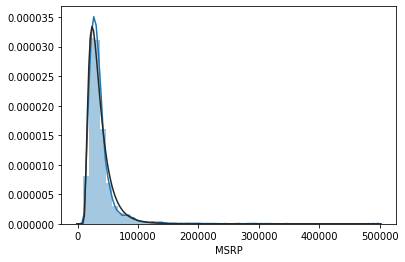

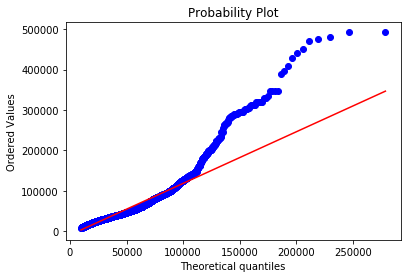

In [406]:
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

sns.distplot(data_num['MSRP'], fit=stats.lognorm)
params = stats.lognorm.fit(data_num['MSRP'])
fig = plt.figure()
res = stats.probplot(data_num['MSRP'], plot=plt, dist=stats.lognorm, sparams=params)

As we can see from the upper plot our distribution seems to be similar to log normal distribution, although the bottom plot implies that there are values later on that deviate from the distribution (potential outliers). The plots for normal distribution were much more off.

Next step is concatenating numerical variables with nominal variables encoded with integer values. 

In [407]:
cars = pd.concat([data_num, data_nom], axis=1)
cars.head()

,MSRP,Front Leg Room (in),Front Shoulder Room (in),Front Head Room (in),Wheelbase (in),"Width, Max w/o mirrors (in)","Height, Overall (in)","Fuel Tank Capacity, Approx (gal)",Turning Diameter - Curb to Curb (ft),Car,Engine,EPA Class,Style Name,Drivetrain,Passenger Capacity,Passenger Doors,Body Style,SAE Net Torque @ RPM,Fuel System,Engine Type,SAE Net Horsepower @ RPM,Displacement,First Gear Ratio (:1),Trans Description Cont.,Reverse Ratio (:1),Trans Type,Brake Type,Front Brake Rotor Diam x Thickness (in),Disc - Front (Yes or ),Steering Type,Front Tire Size,Rear Tire Size,Front Wheel Size (in),Front Wheel Material,Rear Wheel Size (in),Rear Wheel Material,Suspension Type - Front,Suspension Type - Rear,Air Bag-Frontal-Driver,Air Bag-Frontal-Passenger,Air Bag-Passenger Switch (On/Off),Air Bag-Side Body-Front,Air Bag-Side Body-Rear,Air Bag-Side Head-Front,Air Bag-Side Head-Rear,Brakes-ABS,Child Safety Rear Door Locks,Daytime Running Lights,Traction Control,Night Vision,Rollover Protection Bars,Fog Lamps,Parking Aid,Tire Pressure Monitor,Back-Up Camera,Stability Control,Other Features,Basic Miles/km,Basic Years,Corrosion Years,Drivetrain Miles/km,Drivetrain Years,Year
1,40600.0,41.6,59.7,39.6,108.3,74.8,65.7,17.1,39.0,0,329,63,7598,15,6,2,22,668,21,109,631,54,381,10,294,1,1,249,1,54,437,436,118,2,134,2,115,128,1,1,0,1,0,1,1,1,1,1,1,0,0,0,1,1,1,1,5382,6,2,5,8,5,21
2,45500.0,41.6,59.7,39.6,108.3,74.8,65.7,17.1,39.0,0,329,63,7596,15,6,2,22,668,21,109,631,54,381,10,294,1,1,249,1,54,437,436,118,2,134,2,115,128,1,1,0,1,0,1,1,1,1,1,1,0,0,1,1,1,1,1,5383,6,2,5,8,5,21
3,43600.0,41.6,59.7,39.6,108.3,74.8,65.7,17.1,39.0,0,329,63,7594,15,6,2,22,668,21,109,631,54,381,10,294,1,1,249,1,54,601,597,142,2,163,2,115,128,1,1,0,1,0,1,1,1,1,1,1,0,0,1,1,1,1,1,5382,6,2,5,8,5,21
4,37400.0,41.6,59.7,39.6,108.3,74.8,65.7,17.1,39.0,0,329,63,7324,15,6,2,22,668,21,109,631,54,381,10,294,1,1,249,1,54,437,436,118,2,134,2,115,128,1,1,0,1,0,1,1,1,1,1,1,0,0,0,0,1,1,1,5379,6,2,5,8,5,21
5,42600.0,41.6,59.7,39.6,108.3,74.8,65.7,17.1,39.0,0,329,64,6432,8,6,2,22,668,21,109,631,54,381,10,294,1,1,249,1,54,437,436,118,2,134,2,115,128,1,1,0,1,0,1,1,1,1,1,1,0,0,0,1,1,1,1,5382,6,2,5,8,5,21


## Models
### Basic OLS regression
I decided to conduct a few OLS regression models on slightly different datsets and then perform Lasso and Ridge for the set that gave the best results. It could firstly give us a glimpse of what are the differences between the results depending on the form of the variables, the inclusion of outliers, or standarization of data and then compare different machine learning methods. In this chapter I will estimate OLS models in hope to improve them along the way. First one is just a basic model based on current dataset. What is worth noting is that some of our nominal variables have many unique values so binarizing them would not be efficient. But that problem will be faced on later. In this project a 70%/30% division of the data to training and testing sets respectively is used. 

In [408]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error
import numpy as np

y = cars['MSRP'].values.reshape(-1, 1)
X = cars.drop(['MSRP'], axis = 1).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2020)

reg = LinearRegression() 
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

R2 = metrics.r2_score(y_test, y_pred)
MAE = metrics.mean_absolute_error(y_test, y_pred)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))

print("R^2: %.3f" % R2)
print("Mean absolute error: %.3f" % MAE)
print("Root mean squared error: %.3f" % RMSE)

R^2: 0.656
Mean absolute error: 7812.872
Root mean squared error: 15383.935


As we can see the metrics describing our model are R^2 = 0.656, RMSE = 15383.94 and MAE = 7812.87. They are not that good as the cheapest car costs around \\$8000, so our model migh have predicted it to cost around \\$0. From RMSE we can concur that there are indeed some high values that impact the squared part of the RMSE.

We will create a dataframe to contain the results of each model to ease summarizing at the end of the study.

In [409]:
results = pd.DataFrame(columns = ["Model", "R^2", "MAE", "RMSE"])

results = results.append(pd.DataFrame({"Model": "Basic OLS", 
                             "R^2": R2,
                             "MAE": MAE,
                             "RMSE": RMSE},
                             index=[0]),
                         ignore_index=True)

### Standarizad and log-transformed OLS regression

To improve the model we will try to implement some standarization of numerical variables and log transformation of the target variable, which might be helpful with some of the outliers' values and the distribution of the price.

In [410]:
numerical_vars.remove('MSRP')
numerical = cars[numerical_vars]

numerical_std = numerical.apply(lambda x: (x-x.mean())/x.std())
cars['LogMSRP'] = np.log(cars['MSRP'])

cars_norm = pd.concat([cars['LogMSRP'], numerical_std, cars[nominal_vars]], axis=1)

display(cars_norm.head())

,LogMSRP,Front Leg Room (in),Front Shoulder Room (in),Front Head Room (in),Wheelbase (in),"Width, Max w/o mirrors (in)","Height, Overall (in)","Fuel Tank Capacity, Approx (gal)",Turning Diameter - Curb to Curb (ft),Car,Engine,EPA Class,Style Name,Drivetrain,Passenger Capacity,Passenger Doors,Body Style,SAE Net Torque @ RPM,Fuel System,Engine Type,SAE Net Horsepower @ RPM,Displacement,First Gear Ratio (:1),Trans Description Cont.,Reverse Ratio (:1),Trans Type,Brake Type,Front Brake Rotor Diam x Thickness (in),Disc - Front (Yes or ),Steering Type,Front Tire Size,Rear Tire Size,Front Wheel Size (in),Front Wheel Material,Rear Wheel Size (in),Rear Wheel Material,Suspension Type - Front,Suspension Type - Rear,Air Bag-Frontal-Driver,Air Bag-Frontal-Passenger,Air Bag-Passenger Switch (On/Off),Air Bag-Side Body-Front,Air Bag-Side Body-Rear,Air Bag-Side Head-Front,Air Bag-Side Head-Rear,Brakes-ABS,Child Safety Rear Door Locks,Daytime Running Lights,Traction Control,Night Vision,Rollover Protection Bars,Fog Lamps,Parking Aid,Tire Pressure Monitor,Back-Up Camera,Stability Control,Other Features,Basic Miles/km,Basic Years,Corrosion Years,Drivetrain Miles/km,Drivetrain Years,Year
1,10.611523,0.06431,0.183578,0.087236,-0.535451,0.124012,0.031997,-0.5943,0.038739,0,329,63,7598,15,6,2,22,668,21,109,631,54,381,10,294,1,1,249,1,54,437,436,118,2,134,2,115,128,1,1,0,1,0,1,1,1,1,1,1,0,0,0,1,1,1,1,5382,6,2,5,8,5,21
2,10.725468,0.06431,0.183578,0.087236,-0.535451,0.124012,0.031997,-0.5943,0.038739,0,329,63,7596,15,6,2,22,668,21,109,631,54,381,10,294,1,1,249,1,54,437,436,118,2,134,2,115,128,1,1,0,1,0,1,1,1,1,1,1,0,0,1,1,1,1,1,5383,6,2,5,8,5,21
3,10.682812,0.06431,0.183578,0.087236,-0.535451,0.124012,0.031997,-0.5943,0.038739,0,329,63,7594,15,6,2,22,668,21,109,631,54,381,10,294,1,1,249,1,54,601,597,142,2,163,2,115,128,1,1,0,1,0,1,1,1,1,1,1,0,0,1,1,1,1,1,5382,6,2,5,8,5,21
4,10.529426,0.06431,0.183578,0.087236,-0.535451,0.124012,0.031997,-0.5943,0.038739,0,329,63,7324,15,6,2,22,668,21,109,631,54,381,10,294,1,1,249,1,54,437,436,118,2,134,2,115,128,1,1,0,1,0,1,1,1,1,1,1,0,0,0,0,1,1,1,5379,6,2,5,8,5,21
5,10.659610,0.06431,0.183578,0.087236,-0.535451,0.124012,0.031997,-0.5943,0.038739,0,329,64,6432,8,6,2,22,668,21,109,631,54,381,10,294,1,1,249,1,54,437,436,118,2,134,2,115,128,1,1,0,1,0,1,1,1,1,1,1,0,0,0,1,1,1,1,5382,6,2,5,8,5,21


Let's calculate the model with log-transformed dependent variable and standaridized numerical variables.

In [411]:
y = cars_norm['LogMSRP'].values.reshape(-1, 1)
X = cars_norm.drop(['LogMSRP'], axis=1).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2020)

reg = LinearRegression() 
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

R2 = metrics.r2_score(y_test, y_pred)
MAE = metrics.mean_absolute_error(np.exp(y_test), np.exp(y_pred))
RMSE = np.sqrt(mean_squared_error(np.exp(y_test), np.exp(y_pred)))

print("R^2: %.3f" % R2)
print("Mean absolute error: %.3f" % MAE)
print("Root mean squared error: %.3f" % RMSE)

R^2: 0.855
Mean absolute error: 5474.381
Root mean squared error: 14204.051


We can see a clear improvement in terms of both R^2 value and error values. Of course the dependent variable is now different than before (log transformed), so we needet to exponentiate the predictions and test values in order to make a comparison between the non-transformed values and log transformed values. We can see that MAE dropped significantly to around \\$5500 from almost \\$8000, but the RMSE remains high since the outliers are still in the data.

In [412]:
results = results.append(pd.DataFrame({"Model": "After log transform and standarization", 
                             "R^2": R2,
                             "MAE": MAE,
                             "RMSE": RMSE},
                             index=[0]),
                         ignore_index=True)

### Omitting outliers
For further improvment of model I decided to get rid of some of the outliers. To see what are the values of possible outliers I employed some descriptive statistics.

In [413]:
cars_norm.LogMSRP.describe()

count    26506.000000
mean        10.388216
std          0.454542
min          9.059401
25%         10.093901
50%         10.352092
75%         10.612754
max         13.107097
Name: LogMSRP, dtype: float64

Here we can see that 75% of observations are below or equal to 10.612, while max values are around 13. Thus I decided to leave out values of above 11.1, so roughly 0.5 more than the 75% percentile. 

In [414]:
cars_norm_no = cars_norm.loc[cars_norm["LogMSRP"] <= 11.1]
cars_norm_no.LogMSRP.describe()

count    24773.000000
mean        10.311409
std          0.348388
min          9.059401
25%         10.075127
50%         10.320387
75%         10.554771
max         11.099529
Name: LogMSRP, dtype: float64

This maneuver left us with 24773 observations still. We can take a look at our current dataset as previously - with help of histogram and density plots, as well as Q-Q plot.

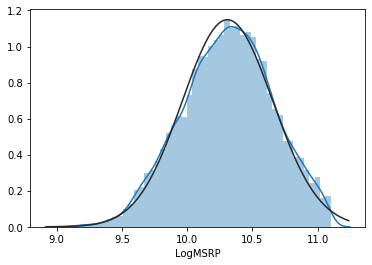

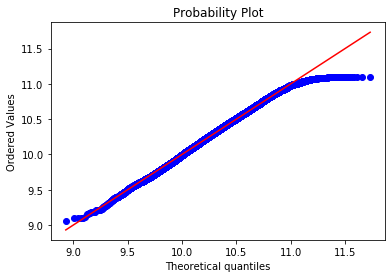

In [415]:
sns.distplot(cars_norm_no['LogMSRP'], fit=stats.lognorm)
params = stats.lognorm.fit(cars_norm_no['LogMSRP'])
fig = plt.figure()
res = stats.probplot(cars_norm_no['LogMSRP'], plot=plt, dist=stats.lognorm, sparams=params)

Since the transformation, standarization and removal of outliers we can see that the price is much better suited to the logarithmic scale and that there are minor deviations on the Q-Q plot.

In [416]:
y = cars_norm_no['LogMSRP'].values.reshape(-1, 1)
X = cars_norm_no.drop(['LogMSRP'], axis = 1).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2020)

reg = LinearRegression() 
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

R2 = metrics.r2_score(y_test, y_pred)
MAE = metrics.mean_absolute_error(np.exp(y_test), np.exp(y_pred))
RMSE = np.sqrt(mean_squared_error(np.exp(y_test), np.exp(y_pred)))

print("R^2: %.3f" % R2)
print("Mean absolute error: %.3f" % MAE)
print("Root mean squared error: %.3f" % RMSE)

R^2: 0.839
Mean absolute error: 3419.299
Root mean squared error: 4745.489


The results are rather better than before, since both mean error values dropped. R^2 dropped as well, but it's less important than previous metrics. Although the model has smaller mean errors and predicts generally "better" than previous one, the omission of higher priced cars may lead to inability to predict more expensive cars. Now the value of average prediction differs from true value for around \\$3400.

In [417]:
results = results.append(pd.DataFrame({"Model": "After removing outliers", 
                             "R^2": R2,
                             "MAE": MAE,
                             "RMSE": RMSE},
                             index=[0]),
                         ignore_index=True)

### Feature Selection
Next step to improve the model is to perform feature selection to see what variables have significant impact on explaining our target variable. 

In [418]:
from sklearn import feature_selection

nominal_vars = [item for item in cars_norm_no.columns if item not in numerical_vars]
nominal_vars.remove("LogMSRP")

mutual_info_nominal = []
for var in nominal_vars:
    mi = feature_selection.mutual_info_regression(cars_norm_no[var].values.reshape(-1,1), 
                                               cars_norm_no["LogMSRP"].values, random_state = 2020)
    mutual_info_nominal.append([var, mi])

numerical_vars = [item for item in numerical_vars if item not in "MSRP"]

mutual_info_numerical = []
for var in numerical_vars:
    mi = feature_selection.mutual_info_regression(cars_norm_no[var].values.reshape(-1,1), 
                                               cars_norm_no["LogMSRP"].values, random_state = 2020)
    mutual_info_numerical.append([var, mi])

print("Nominal variables:")
display(mutual_info_nominal)
print("Numerical variables:")
display(mutual_info_numerical)

Nominal variables:


[['Car', array([0.1878629])],
 ['Engine', array([0.31044463])],
 ['EPA Class', array([0.18574887])],
 ['Style Name', array([0.14434192])],
 ['Drivetrain', array([0.21315452])],
 ['Passenger Capacity', array([0.23425949])],
 ['Passenger Doors', array([0.10031752])],
 ['Body Style', array([0.11499485])],
 ['SAE Net Torque @ RPM', array([0.45185672])],
 ['Fuel System', array([0.14444842])],
 ['Engine Type', array([0.30891492])],
 ['SAE Net Horsepower @ RPM', array([0.48493642])],
 ['Displacement', array([0.28575053])],
 ['First Gear Ratio (:1)', array([0.17771578])],
 ['Trans Description Cont.', array([0.12715085])],
 ['Reverse Ratio (:1)', array([0.15392106])],
 ['Trans Type', array([0.26676964])],
 ['Brake Type', array([0.14099461])],
 ['Front Brake Rotor Diam x Thickness (in)', array([0.36561206])],
 ['Disc - Front (Yes or   )', array([0.00480325])],
 ['Steering Type', array([0.16599399])],
 ['Front Tire Size', array([0.26934487])],
 ['Rear Tire Size', array([0.29344368])],
 ['Front Wh

Numerical variables:


[['Front Leg Room (in)', array([0.45367437])],
 ['Front Shoulder Room (in)', array([0.67972874])],
 ['Front Head Room (in)', array([0.48144586])],
 ['Wheelbase (in)', array([0.80260874])],
 ['Width, Max w/o mirrors (in)', array([0.76895261])],
 ['Height, Overall (in)', array([0.70067263])],
 ['Fuel Tank Capacity, Approx (gal)', array([0.5914769])],
 ['Turning Diameter - Curb to Curb (ft)', array([0.68201749])]]

We can see the mutual information values for both nominal and numerical variables and in case of the former, there are some variables which don't contribute much (have values below 0.02). We will remove them from the dataset and try estimating model on the new set. The numerical variables all seem to have quite high values in comparison with nominal ones.

In [419]:
drop_vars_fs = []

for item in mutual_info_nominal:
    if item[1] < 0.02:
        drop_vars_fs.append(item[0])        

In [420]:
print(drop_vars_fs)

['Disc - Front (Yes or   )', 'Air Bag-Frontal-Driver', 'Air Bag-Frontal-Passenger', 'Night Vision']


There are four variables with mutual info value below 0.02, which can be dropped without decreasing the quality of the model, as it achieves the same scores as before feature selection.

In [421]:
drop_vars_fs.append('LogMSRP')

y = cars_norm_no['LogMSRP'].values.reshape(-1, 1)
X = cars_norm_no.drop(drop_vars_fs, axis = 1).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2020)

reg = LinearRegression() 
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

R2 = metrics.r2_score(y_test, y_pred)
MAE = metrics.mean_absolute_error(np.exp(y_test), np.exp(y_pred))
RMSE = np.sqrt(mean_squared_error(np.exp(y_test), np.exp(y_pred)))

print("R^2: %.3f" % R2)
print("Mean absolute error: %.3f" % MAE)
print("Root mean squared error: %.3f" % RMSE)

R^2: 0.839
Mean absolute error: 3419.267
Root mean squared error: 4745.557


In [422]:
results = results.append(pd.DataFrame({"Model": "After feature selection", 
                             "R^2": R2,
                             "MAE": MAE,
                             "RMSE": RMSE},
                             index=[0]),
                         ignore_index=True)

### Binarization of certain variables
Since the nominal variables in our dataset tend to be either binary already or have tens or hundreds of levels, I decided to binarize those that are not binary but also don't exceed the number of 10 levels. Below we can see that there are not many of them, so one hot-encoding them should not impair the calculations much and might provide beneficial.

In [423]:
drop_vars_fs.remove('LogMSRP')
cars1 = cars_norm_no.drop(drop_vars_fs, axis = 1)

to_binary = []
for col in cars1:
    if len(cars1[col].unique()) > 2 and len(cars1[col].unique()) <= 10:
        print(col)
        to_binary.append(col)

Passenger Capacity
Passenger Doors
Front Wheel Material
Rear Wheel Material
Basic Miles/km
Basic Years
Corrosion Years
Drivetrain Years


In [424]:
dummy = pd.get_dummies(cars1[to_binary].astype(object), drop_first=True)
print(dummy.shape)

cars1_bin = pd.concat([cars1.drop(to_binary, axis=1), dummy], axis=1)
display(cars1_bin.head())
print(cars1_bin.shape)

(24773, 53)


,LogMSRP,Front Leg Room (in),Front Shoulder Room (in),Front Head Room (in),Wheelbase (in),"Width, Max w/o mirrors (in)","Height, Overall (in)","Fuel Tank Capacity, Approx (gal)",Turning Diameter - Curb to Curb (ft),Car,Engine,EPA Class,Style Name,Drivetrain,Body Style,SAE Net Torque @ RPM,Fuel System,Engine Type,SAE Net Horsepower @ RPM,Displacement,First Gear Ratio (:1),Trans Description Cont.,Reverse Ratio (:1),Trans Type,Brake Type,Front Brake Rotor Diam x Thickness (in),Steering Type,Front Tire Size,Rear Tire Size,Front Wheel Size (in),Rear Wheel Size (in),Suspension Type - Front,Suspension Type - Rear,Air Bag-Passenger Switch (On/Off),Air Bag-Side Body-Front,Air Bag-Side Body-Rear,Air Bag-Side Head-Front,Air Bag-Side Head-Rear,Brakes-ABS,Child Safety Rear Door Locks,Daytime Running Lights,Traction Control,Rollover Protection Bars,Fog Lamps,Parking Aid,Tire Pressure Monitor,Back-Up Camera,Stability Control,Other Features,Drivetrain Miles/km,Year,Passenger Capacity_2,Passenger Capacity_3,Passenger Capacity_4,Passenger Capacity_5,Passenger Capacity_6,Passenger Capacity_7,Passenger Capacity_8,Passenger Capacity_9,Passenger Capacity_10,Passenger Doors_1,Passenger Doors_2,Front Wheel Material_1,Front Wheel Material_2,Front Wheel Material_3,Front Wheel Material_4,Front Wheel Material_5,Front Wheel Material_6,Front Wheel Material_7,Rear Wheel Material_1,Rear Wheel Material_2,Rear Wheel Material_3,Rear Wheel Material_4,Rear Wheel Material_5,Rear Wheel Material_6,Rear Wheel Material_7,Basic Miles/km_1,Basic Miles/km_2,Basic Miles/km_3,Basic Miles/km_4,Basic Miles/km_5,Basic Miles/km_6,Basic Miles/km_7,Basic Miles/km_8,Basic Miles/km_9,Basic Years_1,Basic Years_2,Basic Years_3,Basic Years_4,Corrosion Years_1,Corrosion Years_3,Corrosion Years_4,Corrosion Years_5,Corrosion Years_6,Corrosion Years_7,Corrosion Years_8,Drivetrain Years_1,Drivetrain Years_2,Drivetrain Years_3,Drivetrain Years_4,Drivetrain Years_5,Drivetrain Years_6,Drivetrain Years_7,Drivetrain Years_8
1,10.611523,0.06431,0.183578,0.087236,-0.535451,0.124012,0.031997,-0.5943,0.038739,0,329,63,7598,15,22,668,21,109,631,54,381,10,294,1,1,249,54,437,436,118,134,115,128,0,1,0,1,1,1,1,1,1,0,0,1,1,1,1,5382,8,21,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
2,10.725468,0.06431,0.183578,0.087236,-0.535451,0.124012,0.031997,-0.5943,0.038739,0,329,63,7596,15,22,668,21,109,631,54,381,10,294,1,1,249,54,437,436,118,134,115,128,0,1,0,1,1,1,1,1,1,0,1,1,1,1,1,5383,8,21,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
3,10.682812,0.06431,0.183578,0.087236,-0.535451,0.124012,0.031997,-0.5943,0.038739,0,329,63,7594,15,22,668,21,109,631,54,381,10,294,1,1,249,54,601,597,142,163,115,128,0,1,0,1,1,1,1,1,1,0,1,1,1,1,1,5382,8,21,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
4,10.529426,0.06431,0.183578,0.087236,-0.535451,0.124012,0.031997,-0.5943,0.038739,0,329,63,7324,15,22,668,21,109,631,54,381,10,294,1,1,249,54,437,436,118,134,115,128,0,1,0,1,1,1,1,1,1,0,0,0,1,1,1,5379,8,21,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
5,10.659610,0.06431,0.183578,0.087236,-0.535451,0.124012,0.031997,-0.5943,0.038739,0,329,64,6432,8,22,668,21,109,631,54,381,10,294,1,1,249,54,437,436,118,134,115,128,0,1,0,1,1,1,1,1,1,0,0,1,1,1,1,5382,8,21,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0


(24773, 104)


In [425]:
y = cars1_bin['LogMSRP'].values.reshape(-1, 1)
X = cars1_bin.drop(['LogMSRP'], axis = 1).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2020)

reg = LinearRegression() 
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

R2 = metrics.r2_score(y_test, y_pred)
MAE = metrics.mean_absolute_error(np.exp(y_test), np.exp(y_pred))
RMSE = np.sqrt(mean_squared_error(np.exp(y_test), np.exp(y_pred)))

print("R^2: %.3f" % R2)
print("Mean absolute error: %.3f" % MAE)
print("Root mean squared error: %.3f" % RMSE)

R^2: 0.875
Mean absolute error: 2982.959
Root mean squared error: 4168.864


In [426]:
results = results.append(pd.DataFrame({"Model": "After binarization", 
                             "R^2": R2,
                             "MAE": MAE,
                             "RMSE": RMSE},
                             index=[0]),
                         ignore_index=True)

The model estimated on the binarized dataset is so far the best one, with high R^2 statistic and also lower than previous mean error metrics. Current dataset contains 24773 observations and 104 variables. And now the average error on the original prices of cars is equal to \\$2982.96, which is the smallest error so far.

It's the last of OLS models so we will perform a 10-fold cross-validation to see whether the mean metrics are similar to our model's. As we can see the values are generally a oscillating around around just below \\$3000 and the mean cross validation metrics are better than the ones we got. The discrepancies in MAE are that of around \\$100, so not much compared to the value itself (~ 3%).

In [427]:
kf = KFold(n_splits=5, shuffle=True, random_state=2020)

R2_cv = []
MAE_cv = []
RMSE_cv = []

for train, test in kf.split(cars1_bin.index.values):
    reg = LinearRegression() 
    reg.fit(X[train], y[train])
    y_pred = reg.predict(X[test])

    R2 = metrics.r2_score(y[test], y_pred)
    MAE = metrics.mean_absolute_error(np.exp(y[test]), np.exp(y_pred))
    RMSE = np.sqrt(mean_squared_error(np.exp(y[test]), np.exp(y_pred)))

    print(R2, MAE, RMSE)
    
    R2_cv.append(R2)
    MAE_cv.append(MAE)
    RMSE_cv.append(RMSE)
    
print("\nMean 5-fold CV R^2: %.5f" % np.mean(R2))
print("Mean 5-fold CV MAE: %.5f" % np.mean(MAE))
print("Mean 5-fold CV RMSE: %.5f" % np.mean(RMSE))

0.8754699478294076 2961.9099365886386 4148.914741579648
0.8749452095350637 3048.770972682025 4232.97520353225
0.8739624955058148 3021.47038018163 4217.868763839168
0.877560128588745 2938.3327220915808 4141.481510701698
0.8750120541103292 2961.7351792032573 4153.737758842028

Mean 5-fold CV R^2: 0.87501
Mean 5-fold CV MAE: 2961.73518
Mean 5-fold CV RMSE: 4153.73776


Below is the table displaying the metrics after each step, and we can see that there was constantimprovement in terms of MAE and RMSE along the way bar the minunscule drop of performance after feature selection. However we got rid of four variables (out of 67) and decresead the quality of predictions by decimal points, so in our case by cents.

In [428]:
print(results.to_string(index=False))

                                  Model       R^2          MAE          RMSE
                              Basic OLS  0.655625  7812.872051  15383.935440
 After log transform and standarization  0.854850  5474.381361  14204.050913
                After removing outliers  0.838899  3419.298936   4745.488734
                After feature selection  0.838890  3419.266778   4745.556524
                     After binarization  0.874736  2982.959133   4168.863963


***

## Lasso Regression
Now that we have established the set for which regresssion yields the best results, we can try estimating some other forms of regression like Lasso and Ridge to see whether they can improve the model further. A GridSearchCV function is used. What it does is it performs, in our case, a 5-fold cross validation on the training set, finds the hyperparameter value for which the mean score of those cross validations is the highest.

In [429]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

alpha = np.arange(0.01, 5, 0.1)
param_grid = {'alpha': alpha}

lasso = Lasso()
lasso_cv = GridSearchCV(lasso, param_grid, iid = True, cv = 5)
lasso_cv.fit(X_train, y_train)
y_pred = lasso_cv.predict(X_test)

R2 = metrics.r2_score(y_test, y_pred)
MAE = metrics.mean_absolute_error(np.exp(y_test), np.exp(y_pred))
RMSE = np.sqrt(mean_squared_error(np.exp(y_test), np.exp(y_pred)))

print("Tuned alpha parameter: {} \n".format(lasso_cv.best_params_))
print("R^2: %.3f" % R2)
print("Mean absolute error: %.3f" % MAE)
print("Root mean squared error: %.3f" % RMSE)

Tuned alpha parameter: {'alpha': 0.01} 

R^2: 0.807
Mean absolute error: 3749.617
Root mean squared error: 5191.462


We can see that the results are slightly worse than for linear regression and tuned hyperparameter is the lowest possible. The model had previously been tested on different ranges of alpha parameter but always ended on the leftmost end of the range. Sklearn documentation advises agains using Lasso with alpha = 0 as it provides worse results than simple linear regression. So in our case Lasso regression brings nothing new to the table, but worse predictions.

In [430]:
results = results.append(pd.DataFrame({"Model": "Lasso", 
                             "R^2": R2,
                             "MAE": MAE,
                             "RMSE": RMSE},
                             index=[0]),
                         ignore_index=True)

## Ridge regression
Ridge regression is better suited toward regression models rather than feature selection so I'm expecting better results than for Lasso. Again a grid search is conducted. Alpha paramter range values across which a grid search is done is narrowed down by previous testing to reduce the time of computations.

In [431]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

alpha = np.arange(0.01, 0.5, 0.005)
param_grid = {'alpha': alpha}

ridge = Ridge()
ridge_cv = GridSearchCV(ridge, param_grid, iid = True, cv = 5)
ridge_cv.fit(X_train, y_train)
y_pred = ridge_cv.predict(X_test)

R2 = metrics.r2_score(y_test, y_pred)
MAE = metrics.mean_absolute_error(np.exp(y_test), np.exp(y_pred))
RMSE = np.sqrt(mean_squared_error(np.exp(y_test), np.exp(y_pred)))

print("Tuned alpha parameter: {} \n".format(ridge_cv.best_params_))
print("R^2: %.3f" % R2)
print("Mean absolute error: %.3f" % MAE)
print("Root mean squared error: %.3f" % RMSE)

Tuned alpha parameter: {'alpha': 0.29} 

R^2: 0.875
Mean absolute error: 2982.622
Root mean squared error: 4165.307


As expected Ridge regression provides much better results than Lasso and in fact those metrics state that this model is on par with linear regression performed earlier.


In [432]:
results = results.append(pd.DataFrame({"Model": "Ridge", 
                             "R^2": R2,
                             "MAE": MAE,
                             "RMSE": RMSE},
                             index=[0]),
                         ignore_index=True)

***

# Summary

Below we can see the R squared, mean absolute error and root mean squared error of all the models conducted in this project, sorted ascendingly by the MAE value.

In [433]:
results_sort = results.sort_values(by=['MAE'])
print(results_sort.to_string(index=False))

                                  Model       R^2          MAE          RMSE
                                  Ridge  0.874785  2982.621624   4165.306844
                     After binarization  0.874736  2982.959133   4168.863963
                After feature selection  0.838890  3419.266778   4745.556524
                After removing outliers  0.838899  3419.298936   4745.488734
                                  Lasso  0.807226  3749.616668   5191.461642
 After log transform and standarization  0.854850  5474.381361  14204.050913
                              Basic OLS  0.655625  7812.872051  15383.935440


After conducting transformations, binarizations, omitting of the outliers, I can say that out of the three different methods used (Linear Regression, Lasso, Ridge) Linear and Ridge regressions performed almost on par. The two of them had mean absolute error of about \\$3000 dollars, which is a reasonable amount when estimating the price of a car rather counted in tens of thousands.

The Lasso performed a little worse but it was expected as feature selection was already performed. The R^2 statistics were on average well above 0.8 so a good proportion of variance of price was explained by our independent variables. RMSE tended to be heigher than MAE in every instance, what could indicate the bigger impact of higher prices of cars. From this we could gather that maybe additional removal of some higher than average values would improve the model further. 